In [14]:
import pandas as pd
import os

%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# Give our graph axis labels
from matplotlib import style


In [15]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')


In [16]:
mars_df = df[0]
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [17]:
#How many months exist on Mars? 12
mars_df['month'].max()

12

In [18]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset? 1867
mars_df['sol'].nunique()

1867

In [19]:
#What are the coldest and the warmest months on Mars?   COLDEST - 3, WARMEST 8
mars_df_temp=mars_df.groupby(['month']).mean()
mars_df_temp.sort_values('min_temp')

,id,sol,ls,min_temp,pressure
month,,,,,
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
6,735.306122,750.829932,164.897959,-75.299320,745.054422
12,931.602410,990.951807,344.692771,-74.451807,842.156627
7,714.549296,715.105634,194.894366,-72.281690,795.105634
11,874.246377,947.224638,314.536232,-71.985507,857.014493


In [20]:
mars_df_temp2=mars_df_temp[mars_df_temp.columns[~mars_df_temp.columns.isin(['id', 'sol','ls','pressure'])]]
mars_df_temp2

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


(-85.0, -65.0)

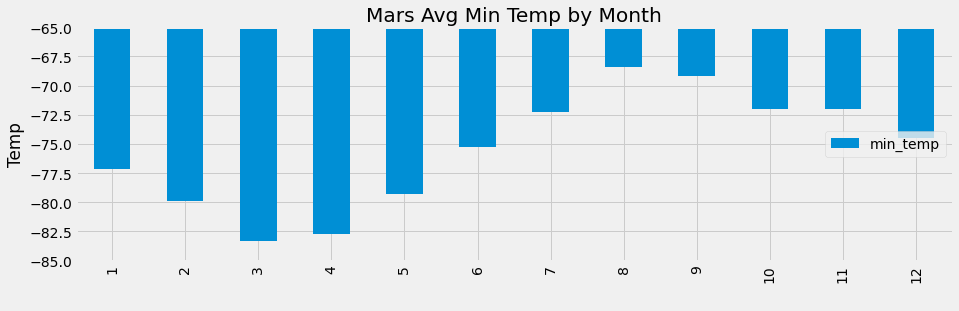

In [21]:
style.use('fivethirtyeight')
fig_week=mars_df_temp2.plot.bar(figsize=(14,4))
fig_week.set_title("Mars Avg Min Temp by Month")
fig_week.set_ylabel("Temp")
fig_week.set_xlabel(" ")
fig_week.legend(loc = "right")
plt.ylim([-85, -65])

In [22]:
#Which months have the lowest and the highest atmospheric pressure on Mars? LOWEST - 6, HIGHEST - 9
mars_df_temp=mars_df.groupby(['month']).mean()
mars_df_temp.sort_values('pressure')

,id,sol,ls,min_temp,pressure
month,,,,,
6,735.306122,750.829932,164.897959,-75.299320,745.054422
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
7,714.549296,715.105634,194.894366,-72.281690,795.105634
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
12,931.602410,990.951807,344.692771,-74.451807,842.156627
11,874.246377,947.224638,314.536232,-71.985507,857.014493
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
8,718.078014,795.333333,224.347518,-68.382979,873.829787
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917


In [23]:
mars_df_temp3=mars_df_temp[mars_df_temp.columns[~mars_df_temp.columns.isin(['id', 'sol','ls','min_temp'])]]
mars_df_temp3

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


(740.0, 920.0)

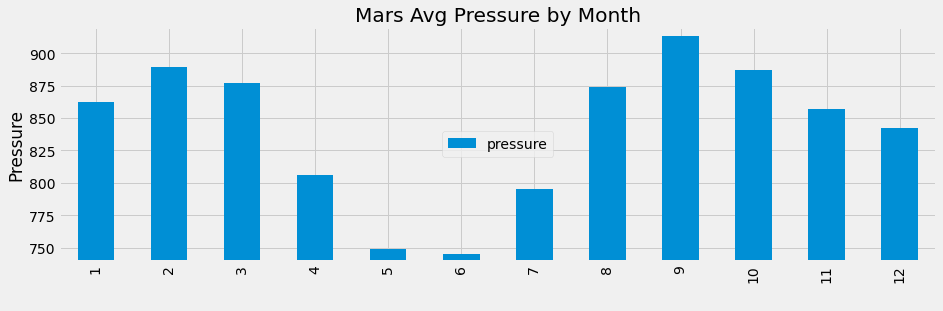

In [24]:
style.use('fivethirtyeight')
fig_week=mars_df_temp3.plot.bar(figsize=(14,4))
fig_week.set_title("Mars Avg Pressure by Month")
fig_week.set_ylabel("Pressure")
fig_week.set_xlabel(" ")
fig_week.legend(loc = "center")
plt.ylim([740, 920])

In [25]:
mars_df_days=mars_df.loc[(mars_df['month'] == 3) #COLDEST MONTH
& (mars_df['min_temp'] <= -83) & (mars_df['min_temp'] >-84)] #COLDEST TEMP
mars_df_days

,id,terrestrial_date,sol,ls,month,min_temp,pressure
428,442,2014-01-10,508,73,3,-83.0,893.0
456,470,2014-02-07,536,86,3,-83.0,867.0
457,469,2014-02-08,537,86,3,-83.0,865.0
1066,1092,2015-11-12,1161,66,3,-83.0,898.0
1116,1142,2016-01-02,1211,89,3,-83.0,853.0


In [19]:
mars_df_days.groupby('month')['terrestrial_date'].apply(lambda x: x.max() - x.min())


month
3   722 days
Name: terrestrial_date, dtype: timedelta64[ns]

In [26]:
mars_df2=mars_df.groupby(["terrestrial_date"]).min()[["min_temp"]]
mars_df2

,min_temp
terrestrial_date,
2012-08-16,-75.0
2012-08-17,-76.0
2012-08-18,-76.0
2012-08-19,-74.0
2012-08-20,-74.0
...,...
2018-02-23,-78.0
2018-02-24,-77.0
2018-02-25,-76.0


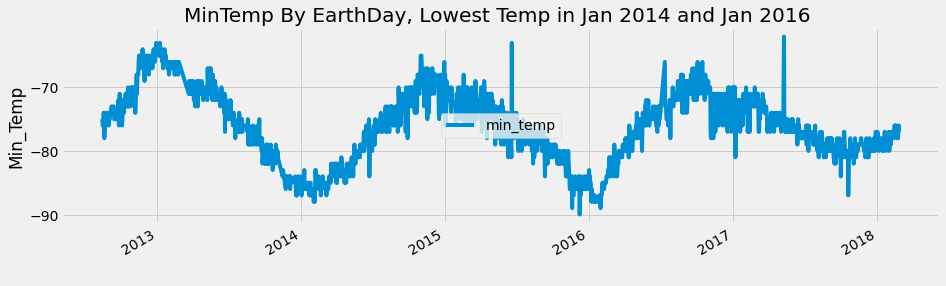

In [29]:
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig_week=mars_df2.plot(figsize=(14,4))
fig_week.set_title("MinTemp By EarthDay, Lowest Temp in Jan 2014 and Jan2016 ")
fig_week.set_ylabel("Min_Temp")
fig_week.set_xlabel(" ")
fig_week.legend(loc = "center")

In [ ]:
import os  
os.makedirs('Output', exist_ok=True)  
mars_df.to_csv('Output/Mars_ScrapData.csv')  
mars_df_temp2.to_csv('Output/Mars_Temp.csv')  
mars_df_temp3.to_csv('Output/Mars_Press.csv')  
mars_df_days.to_csv('Output/LowTempcycle.csv')  